In [5]:
"""
arj1
Arjun Srivastava
AMATH 301 B
"""

import numpy as np
import matplotlib.pyplot as plt

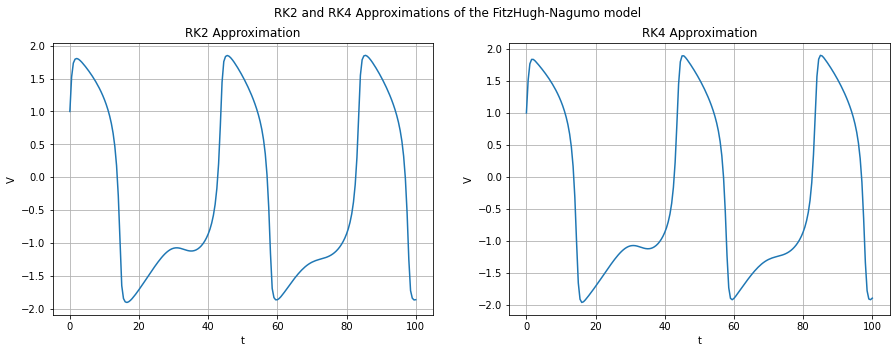

In [128]:
# Problem 1

a = 0.7
b = 1
tau = 12
I = lambda t : (1/10) * (5 + np.sin(np.pi * t / 10))
f = lambda t, sys : np.array([(sys[0] - ((sys[0]**3) / 3) - sys[1] + I(t)), (a + sys[0] - b * sys[1]) / tau])
sys0 = [1, 0]

# Set up plot
fig, axs = plt.subplots(ncols = 2, figsize = (15, 5))
fig.suptitle("RK2 and RK4 Approximations of the FitzHugh-Nagumo model")

# a)

# RK2

dt = 0.5
T = 100
t = np.arange(0, T + dt, dt)
n = t.size

V = np.zeros((2, n))
V[:, 0] = sys0
for k in range(n - 1):
    f1 = f(t[k], V[:, k])
    V[:, k + 1] = V[:, k] + dt * f(t[k] + dt / 2, V[:, k] + (dt / 2) * f1)
    
A1 = V.copy()[0].reshape(1, n)

# Plot voltage

axs[0].plot(t, V[0])
axs[0].set_title("RK2 Approximation")
axs[0].set_xlabel("t")
axs[0].set_ylabel("V")
axs[0].grid()

# b)

A2 = t[np.argmax(A1[0][0:21])]

# c)

A3 = t[np.argmax(A1[0][:101])]

# d) 

# firing rate

A4 = 1/(A3-A2)

# e)

# RK4

dt = 0.5
T = 100
t = np.arange(0, T + dt, dt)
n = t.size

V = np.zeros((2, n))
V[:, 0] = sys0
for k in range(n - 1):
    f1 = f(t[k], V[:, k])
    f2 = f(t[k] + dt / 2, V[:, k] + (dt / 2) * f1)
    f3 = f(t[k] + dt / 2, V[:, k] + (dt / 2) * f2)
    f4 = f(t[k] + dt, V[:, k] + dt * f3)
    V[:, k + 1] = V[:, k] + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    
A5 = V.copy()[0].reshape(1, n)

# Plot voltage

axs[1].plot(t, V[0])
axs[1].set_title("RK4 Approximation")
axs[1].set_xlabel("t")
axs[1].set_ylabel("V")
axs[1].grid()

# f)

A6 = t[np.argmax(A5[0][0:21])]

# g)

A7 = t[np.argmax(A5[0][:101])]

# h)

A8 = 1/(A7-A6)

In [ ]:
# Problem 2

